In [1]:
import numpy as np
import os
import scipy.stats as stats
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import sys
sys.path.append('/home/bxie/PycharmProjects/KDEL/benchmark/analysis')
from correlation import read_prediction_txt, r2_np, r_np, pearson, spearman, kendall
import matplotlib
import matplotlib.pyplot as plt
font = {'weight' : 'bold',
        'size'   : 12}
matplotlib.rc('font', **font)

# The conclusion is in the last cell.
### There is little difference among each unit number results.
### 32 unit is the best among the estimation.

In [2]:
work_dir = '/home/bxie/PycharmProjects/KDEL/benchmark/building_new_model/validate_unit_number'
os.chdir(work_dir)
num_units = ['16unit','32unit','64unit','128unit']

y_axis_labels = {}
y_axis_labels['mean_absolute_error']='Mean Absolute Error'
y_axis_labels['r2_np']='R Squared'    #through numpy.corrcoef
y_axis_labels['r2_score']='R Squared' #through sklearn.metrics
y_axis_labels['mean_squared_error']='Mean Squared Error'
y_axis_labels['pearson']='Pearson'+"'"+'r'
y_axis_labels['r_np'] = 'R Correlation Coefficience'
y_axis_labels['spearman']= 'Spearman'+"'"+r'$\rho$'
y_axis_labels['kendall'] = 'Kendall'+"'"+r'$\tau$'
condition_list = list(y_axis_labels.keys())


16unit Plot


<Figure size 432x288 with 0 Axes>

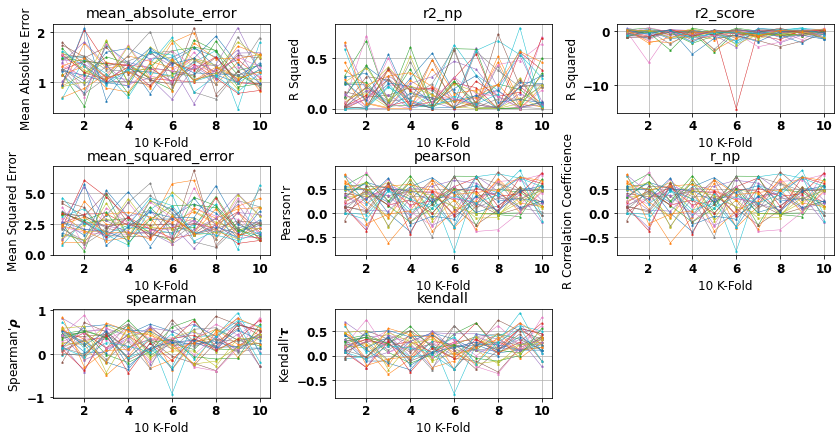

32unit Plot


<Figure size 432x288 with 0 Axes>

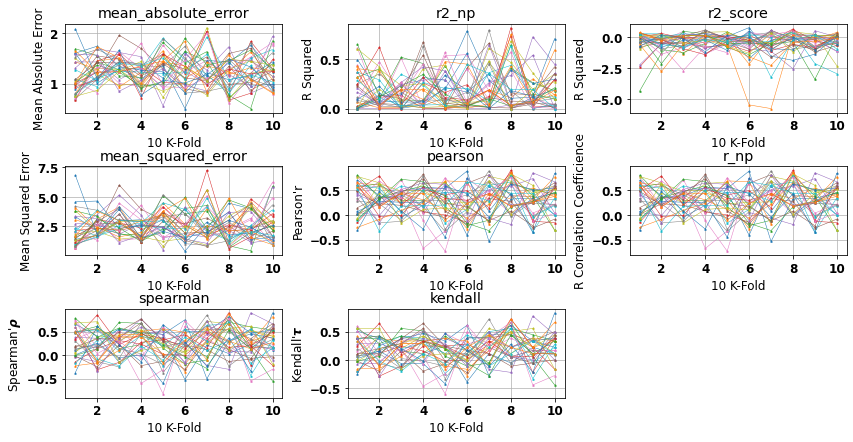

64unit Plot


<Figure size 432x288 with 0 Axes>

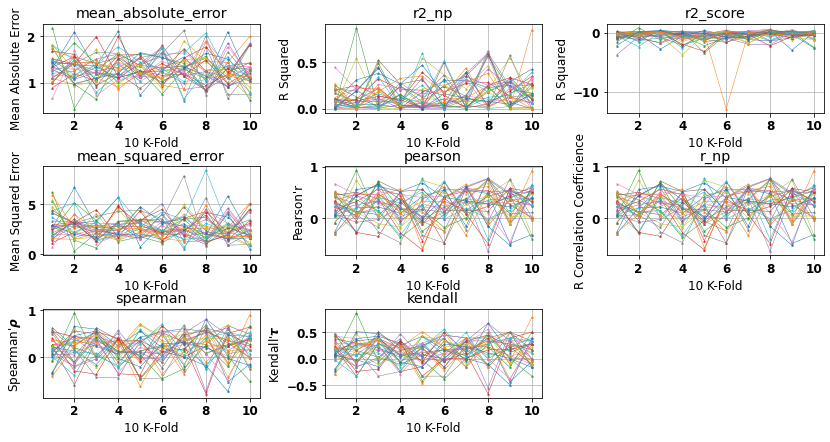

128unit Plot


<Figure size 432x288 with 0 Axes>

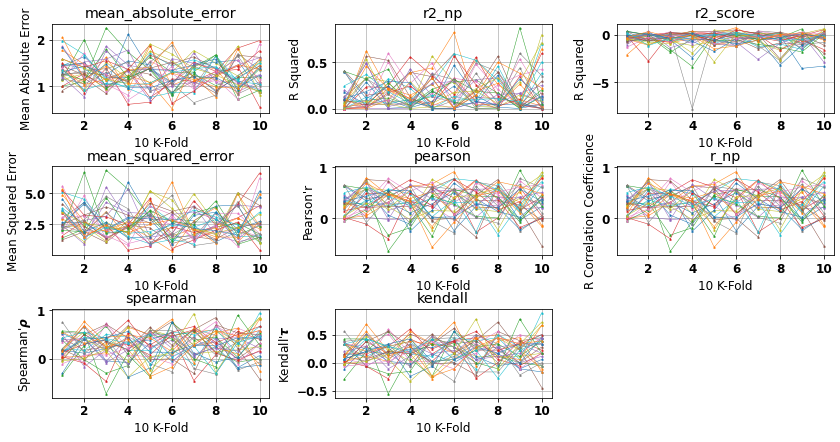

In [3]:
for unit_i in range(len(num_units)):
    plt.clf()
    plt.figure(figsize=(14,20))
    plot_index=1
    num_unit = num_units[unit_i]
    print (num_unit, 'Plot')
    for c in condition_list:
        plt.subplot(len(condition_list), 3, plot_index)
        for i in range(32):
            data = []
            for j in range(10):
                data_name_format = 'cross_validation_checkpoints_'+str(i)+'_LSTM_3000_Fold'+str(j)+'.txt'
                
                y = []
                pred = []
                filename = os.path.join(num_unit, 'rnn_modular_package',data_name_format)
                try:
                    y, pred = read_prediction_txt(filename)
                    y = np.array(y)
                    pred = np.array(pred)
                    correlation = locals()[c](y, pred)
                    if 'pearson' in c or 'spearman' in c or 'kendall' in c:
                        correlation = correlation[0]
                    data.append(correlation)
                except:
                    continue
            plt.plot(data,'-^', lw = 0.5,markersize=1.5)
        plt.title(c)
        plt.xticks([1,3,5,7,9],['2','4','6','8','10'])
        plt.ylabel(y_axis_labels[c])
        plt.grid(axis='y',alpha=0.9)
        plt.grid(axis='x',alpha=0.9)
        plt.xlabel('10 K-Fold')
        plot_index+=1
    plt.subplots_adjust(hspace=0.6)
    plt.subplots_adjust(wspace=0.3)
    plt.show()


16unit Plot


<Figure size 432x288 with 0 Axes>

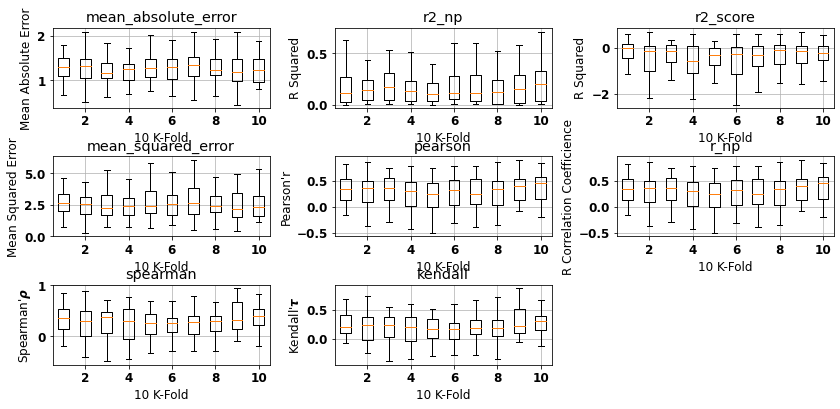

32unit Plot


<Figure size 432x288 with 0 Axes>

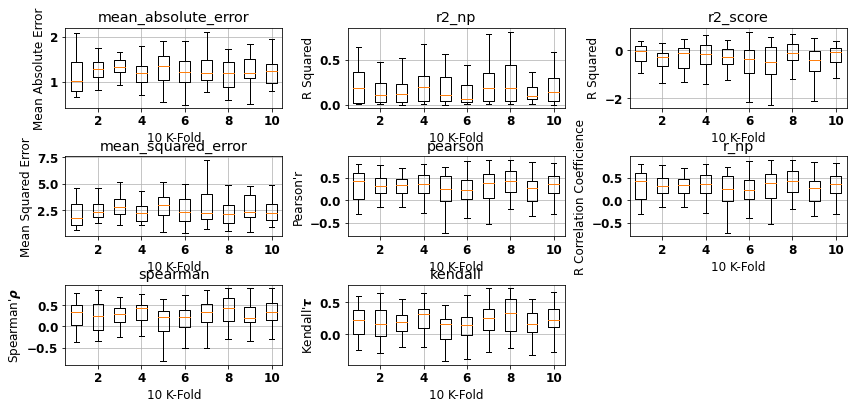

64unit Plot


<Figure size 432x288 with 0 Axes>

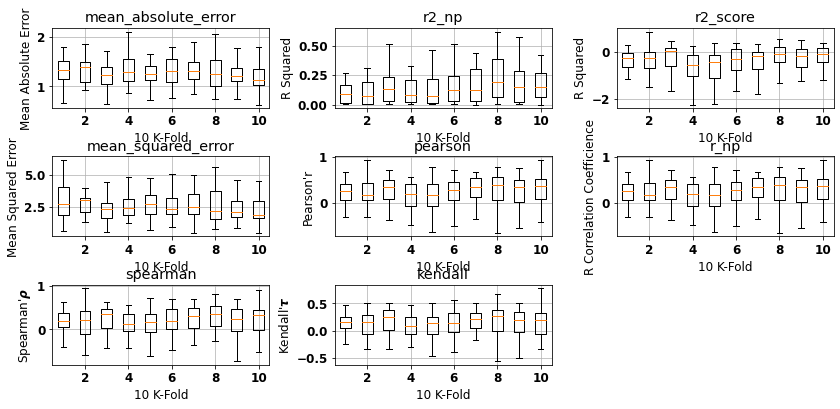

128unit Plot


<Figure size 432x288 with 0 Axes>

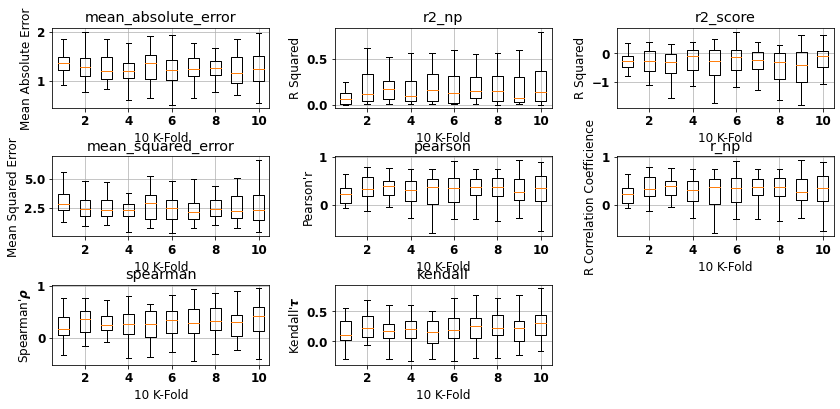

In [4]:
# Box plot
for unit_i in range(len(num_units)):
    
    plt.clf()
    plt.figure(figsize=(14,18))
    plot_index=1
    num_unit = num_units[unit_i]
    print (num_unit, 'Plot')
    
    # Didn't do average, Didn't do bootstraping

    for c in condition_list:
        box_data =[]
        #average_data = []
        #std_data = []
        
        plt.subplot(len(condition_list), 3, plot_index)
        for j in range(10):# 10 fold
            data = []
            for i in range(32):
                data_name_format = 'cross_validation_checkpoints_'+str(i)+'_LSTM_3000_Fold'+str(j)+'.txt'
                y = []
                pred = []
                filename = os.path.join(num_unit, 'rnn_modular_package',data_name_format)
                try:
                    y, pred = read_prediction_txt(filename)
                    y = np.array(y)
                    pred = np.array(pred)
                    correlation = locals()[c](y, pred)
                    if 'pearson' in c or 'spearman' in c or 'kendall' in c:
                        correlation = correlation[0]
                    data.append(correlation)
                except:
                    continue
            #average_data.append(np.mean(data))
            #std_data.append(np.std(data))
            
            box_data.append(data)

        #se_data = [s/np.sqrt(len(std_data)) for s in std_data]

        plt.boxplot(box_data, showfliers=False)    
        plt.title(c)
        plt.xticks([2,4,6,8,10],['2','4','6','8','10'])
        plt.ylabel(y_axis_labels[c])
        plt.grid(axis='y',alpha=0.9)
        plt.grid(axis='x',alpha=0.9)
        plt.xlabel('10 K-Fold')
        plot_index+=1
    plt.subplots_adjust(hspace=0.6)
    plt.subplots_adjust(wspace=0.3)
    plt.show()

In [5]:
dataset = {} #
for unit_i in range(len(num_units)):
    num_unit = num_units[unit_i]
    dataset[num_unit] = {}
    
    for c in condition_list:
        box_data =[]
        for i in range(32):
            data = []
            for j in range(10):# 10 fold
                data_name_format = 'cross_validation_checkpoints_'+str(i)+'_LSTM_3000_Fold'+str(j)+'.txt'
                y = []
                pred = []
                filename = os.path.join(num_unit, 'rnn_modular_package',data_name_format)
                y, pred = read_prediction_txt(filename)
                y = np.array(y)
                pred = np.array(pred)
                correlation = locals()[c](y, pred)
                if 'pearson' in c or 'spearman' in c or 'kendall' in c:
                    correlation = correlation[0]
                data.append(correlation)

            box_data.append(data)
        dataset[num_unit][c] = box_data

In [6]:
print (dataset['16unit'].keys())
colors={'16unit':'green', '32unit':'blue','64unit':'red','128unit':'orange'}

dict_keys(['mean_absolute_error', 'r2_np', 'r2_score', 'mean_squared_error', 'pearson', 'r_np', 'spearman', 'kendall'])


Text(0.5, 0, 'models')

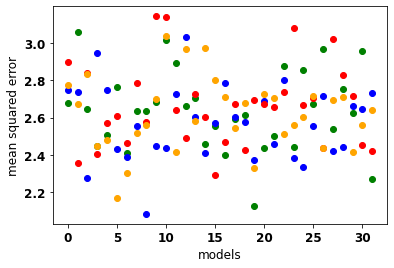

In [7]:
#for condition_name in dataset['16unit'].keys():
condition_name = 'mean_squared_error'

plt.figure()

for key in dataset.keys():
    for i in range(len(dataset[key][condition_name])):
        plt.scatter(i, np.mean(dataset[key][condition_name][i]), color = colors[key])
plt.ylabel(condition_name.replace('_',' '))
plt.xlabel('models')


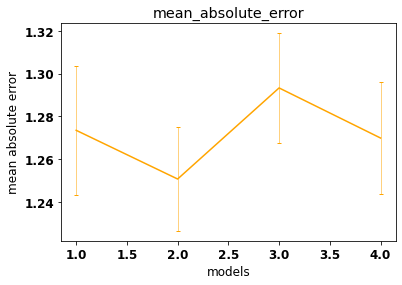

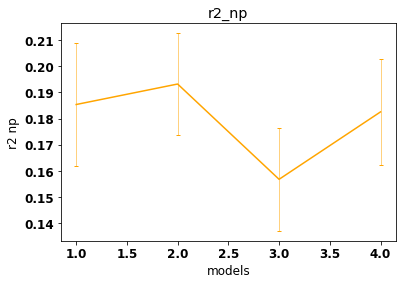

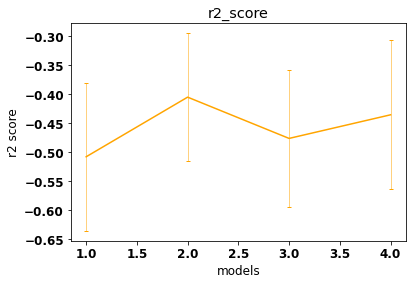

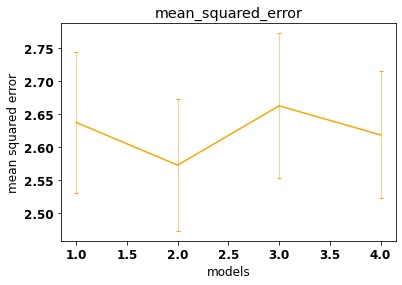

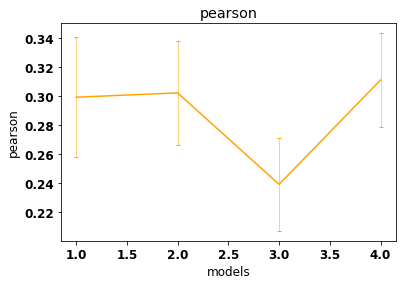

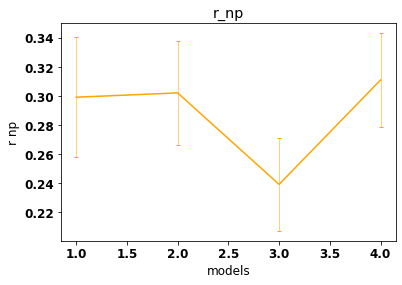

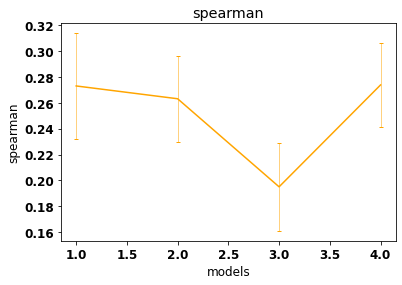

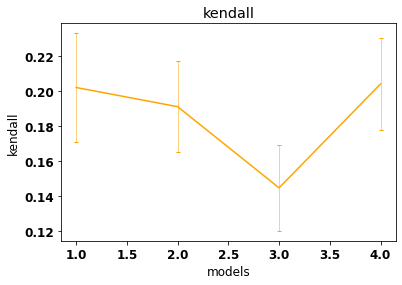

In [8]:
for condition_name in dataset['16unit'].keys():
    plt.figure()
    y_values = []
    y_err= []
    for key in dataset.keys(): # 16,32,64,128
        tem = [] 
        for i in range(len(dataset[key][condition_name])):
            tem.append(np.mean(dataset[key][condition_name][i]))

        y_values.append(np.mean(tem))
        y_err.append(np.std(tem))
        
    y_se = [ e/np.sqrt(len(y_err)) for e in y_err]
    plt.errorbar([1,2,3,4], y_values, yerr=y_se ,color = colors[key], elinewidth = 0.5,capsize =2 )
    plt.ylabel(condition_name.replace('_',' '))
    plt.xlabel('models')
    plt.title(condition_name)


In [ ]:
nrepeat = 100 # number of bootstrapping runs 
condition_name = 'mean_squared_error'

plt.figure()
y_values = []
all_y_values = {}

for key in dataset.keys(): # 16,32,64,128
    tem = []
    all_y_values[key] = []
    
    for times in range(nrepeat):
        select_nums = np.random.choice(32,32)
        _tem = [] # 32 data points/models
        for i in range(len(dataset[key][condition_name])): # loop 32 models
            __tem = []
            for _ in range(10):
                selected_10fold_nums = np.random.choice(10,10)
                boot_10fold_data = [dataset[key][condition_name][i][t] for t in selected_10fold_nums]
                __tem.append(np.mean(boot_10fold_data))
            _tem.append(np.mean(__tem))
            
            #_tem.append(np.mean(dataset[key][condition_name][i])) # took 10-folds average, then add to _tem list
                    
        select_data = [_tem[s] for s in select_nums] # bootstrap _tem
        tem.append(np.mean(select_data))
        
        all_y_values[key].append(np.mean(select_data)) # all_y_values
        
    y_values.append(np.mean(tem))
    
plt.plot([1,2,3,4], y_values, color = colors[key], lw = 2)

for i in range(nrepeat):
    each_time_y = []
    for key in all_y_values.keys():
        each_time_y.append(all_y_values[key][i])
    plt.plot([1,2,3,4], each_time_y, color = 'blue', lw = 0.3, alpha = 0.5)
plt.xticks([1,2,3,4],['16','32','64','128'])
plt.ylabel(condition_name.replace('_',' '))
plt.xlabel('units')



# Final result: The RMSE results. Draw conclusion based on this cell.

Text(0.5, 0, 'units')

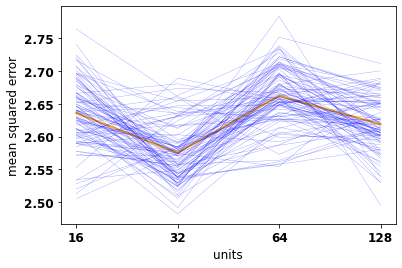

In [9]:
# RMSE

nrepeat = 100 # number of bootstrapping runs 
condition_name = 'mean_squared_error'

plt.figure()
y_values = []
all_y_values = {}

for key in dataset.keys(): # 16,32,64,128
    tem = []
    all_y_values[key] = []
    
    for times in range(nrepeat):
        select_nums = np.random.choice(32,32)
        
        _tem = [] # 32 data points/models
        for i in range(len(dataset[key][condition_name])): # loop 32 models
            __tem = []
            for _ in range(100):
                selected_10fold_nums = np.random.choice(10,10)
                boot_10fold_data = [np.sqrt(dataset[key][condition_name][i][t]) for t in selected_10fold_nums]
                __tem.append(np.mean(boot_10fold_data))
            _tem.append(np.mean(__tem))
            
            #_tem.append(np.mean(dataset[key][condition_name][i])) # took 10-folds average, then add to _tem list
                    
        select_data = [_tem[s] for s in select_nums] # bootstrap _tem
        tem.append(np.mean(select_data))
        
        all_y_values[key].append(np.mean(select_data)) # all_y_values
        
    y_values.append(np.mean(tem))
    
plt.plot([1,2,3,4], y_values, color = colors[key], lw = 2)

for i in range(nrepeat):
    each_time_y = []
    for key in all_y_values.keys():
        each_time_y.append(all_y_values[key][i])
    plt.plot([1,2,3,4], each_time_y, color = 'blue', lw = 0.3, alpha = 0.5)
plt.xticks([1,2,3,4],['16','32','64','128'])
plt.ylabel('RMSE')
plt.xlabel('units')


# Final result: The RMSE results. Draw conclusion based on this cell.

Text(0.5, 0, 'units')

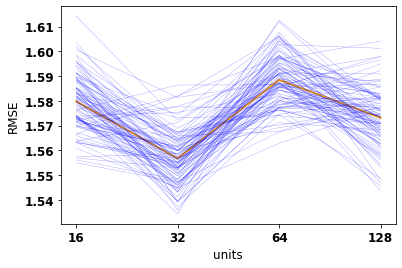

In [12]:
# RMSE

nrepeat = 100 # number of bootstrapping runs 
condition_name = 'mean_squared_error'

plt.figure()
y_values = []
all_y_values = {}

for key in dataset.keys(): # 16,32,64,128
    tem = []
    all_y_values[key] = []
    
    for times in range(nrepeat):
        select_nums = np.random.choice(32,32)
        
        _tem = [] # 32 data points/models
        for i in range(len(dataset[key][condition_name])): # loop 32 models
            __tem = []
            for _ in range(100):
                selected_10fold_nums = np.random.choice(10,10)
                boot_10fold_data = [np.sqrt(dataset[key][condition_name][i][t]) for t in selected_10fold_nums]
                __tem.append(np.mean(boot_10fold_data))
            _tem.append(np.mean(__tem))
            
            #_tem.append(np.mean(dataset[key][condition_name][i])) # took 10-folds average, then add to _tem list
                    
        select_data = [_tem[s] for s in select_nums] # bootstrap _tem
        tem.append(np.mean(select_data))
        
        all_y_values[key].append(np.mean(select_data)) # all_y_values
        
    y_values.append(np.mean(tem))
    
plt.plot([1,2,3,4], y_values, color = colors[key], lw = 2)

for i in range(nrepeat):
    each_time_y = []
    for key in all_y_values.keys():
        each_time_y.append(all_y_values[key][i])
    plt.plot([1,2,3,4], each_time_y, color = 'blue', lw = 0.3, alpha = 0.5)
plt.xticks([1,2,3,4],['16','32','64','128'])
plt.ylabel('RMSE')
plt.xlabel('units')
